In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]

In [4]:
from Utils.mnist import MNISTImages
mnist = MNISTImages()
example_image = np.squeeze(mnist.train_input[4])

Using TensorFlow backend.


11493376/11490434 [==============================] - 7s     


In [5]:
def show_images(images, titles = [], fontsize=18):
    rows = math.ceil(len(images)/4)
    
    f = plt.figure(figsize=(16,rows*5))
    for i in range(len(images)):
        sp = f.add_subplot(rows,4,i+1)
        
        if i < len(titles):
            sp.set_title(titles[i], fontsize=fontsize)
            
        sp.imshow(images[i], cmap='gray_r', vmin=0)
        
    plt.show()

# Image classification

In [6]:
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.optimizers import Nadam


model = Sequential([
    Conv2D(10,(7,7), input_shape=(28,28,1)),
    LeakyReLU(alpha=0.3),
    Conv2D(10,(7,7)),
    LeakyReLU(alpha=0.3),
    Conv2D(10,(7,7)),
    LeakyReLU(alpha=0.3),
    Conv2D(10,(3,3)),
    LeakyReLU(alpha=0.3),
    Conv2D(10,(8,8)),
    Flatten(),
    Activation('softmax')
])

opt = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.006)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from keras.preprocessing import image

train_generator = image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
).flow(mnist.train_input, mnist.train_labels, batch_size=512)

test_generator = image.ImageDataGenerator().flow(mnist.test_input, mnist.test_labels)

In [8]:
model.fit_generator(
    train_generator, 
    epochs=6, 
    steps_per_epoch=117, 
    validation_data=test_generator, 
    validation_steps=len(mnist.test_labels)/20
)

Epoch 1/6
117/117 [==============================] - ETA: 0s - loss: 1.0303 - acc: 0.6676 - val_loss: 0.2742 - val_acc: 0.9182
Epoch 2/6
117/117 [==============================] - ETA: 0s - loss: 0.4634 - acc: 0.8599 - val_loss: 0.1546 - val_acc: 0.9544
Epoch 3/6
117/117 [==============================] - ETA: 0s - loss: 0.3472 - acc: 0.8961 - val_loss: 0.1186 - val_acc: 0.9620
Epoch 4/6
117/117 [==============================] - ETA: 0s - loss: 0.2980 - acc: 0.9107 - val_loss: 0.0953 - val_acc: 0.9708
Epoch 5/6
117/117 [==============================] - ETA: 0s - loss: 0.2640 - acc: 0.9210 - val_loss: 0.1059 - val_acc: 0.9685
Epoch 6/6
117/117 [==============================] - ETA: 0s - loss: 0.2398 - acc: 0.9274 - val_loss: 0.1102 - val_acc: 0.9647


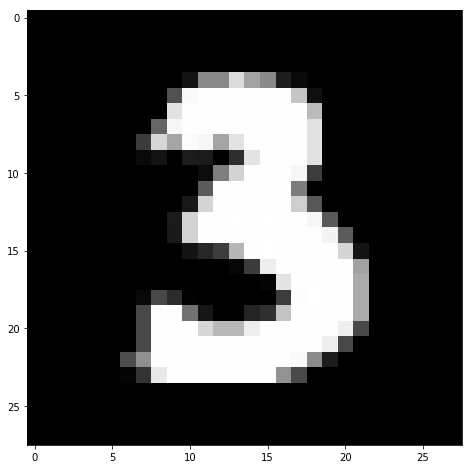

In [9]:
preview_generator = image.ImageDataGenerator().flow(
    mnist.test_input, 
    mnist.test_labels, 
    batch_size=1, 
    shuffle=True
)

imgs, original_label_ids = next(preview_generator)

while original_label_ids[0,3] != 1:
    imgs, original_label_ids = next(preview_generator)

preds = model.predict(imgs)
labels = (np.argmax(preds, axis=1))

plt.imshow(imgs[0,:,:,0], cmap='gray')

In [10]:
from keras.models import Model

def show_layers(d, layers):
    rows = len(layers)
    f = plt.figure(figsize=(15,1.8*rows))
    
    i = 0
    for index in layers:
        intermediate_model = Model(input=model.input, output=model.get_layer(model.layers[index].name).output)
        intermediate_result = intermediate_model.predict(d)
        max_value = np.max(intermediate_result)
        min_value = np.min(intermediate_result)
        for m in range(intermediate_result.shape[3]):
            i+=1
            sp = f.add_subplot(rows, 10, i)
            sp.axis('off')
            plt.imshow(intermediate_result[0,:,:,m], cmap='gray', vmin=min_value, vmax=max_value)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("le...)`
  if __name__ == '__main__':


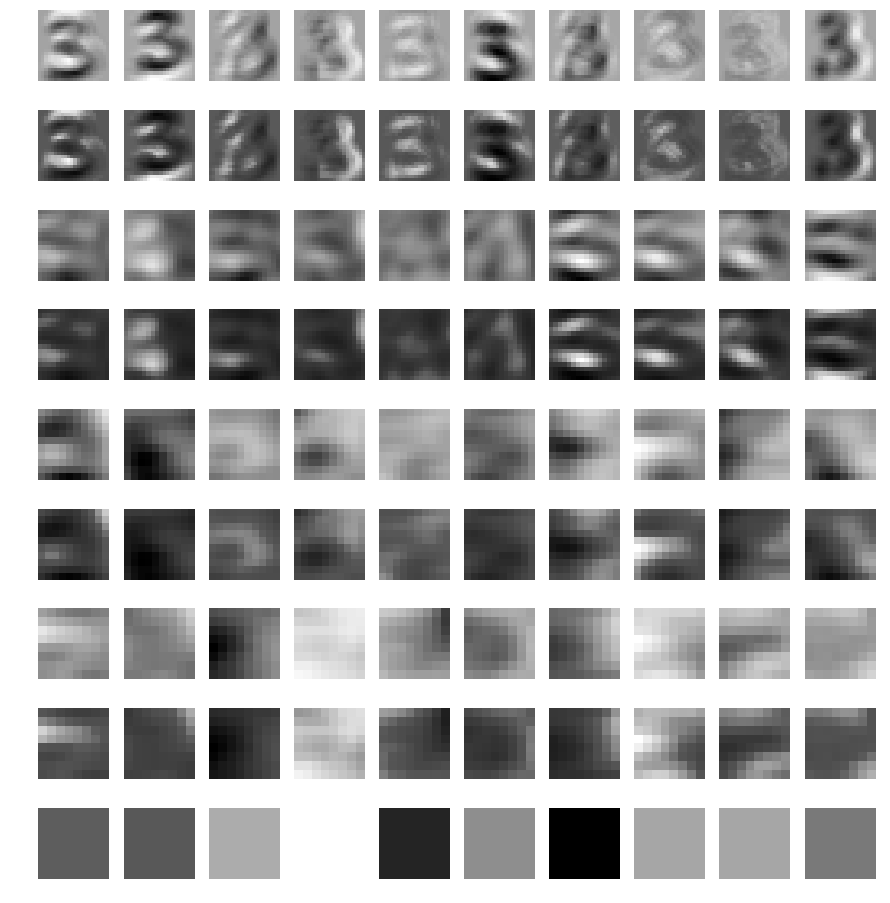

In [13]:
show_layers(imgs,[0,1,2,3,4,5,6,7,8])

In [ ]:
#model.save_weights('/data/trained_models/mnist_for_talk.h5')

In [ ]:
#model.load_weights('/data/trained_models/mnist_for_talk.h5')